<a href="https://colab.research.google.com/github/muhammadsantosa/deep_learning_fastai_pytorch/blob/main/chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 / Lecture 2

### Cleaning Data

In [ ]:
!pip install -Uqq fastai
!pip install -U duckduckgo_search
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.9 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip'

In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('grizzly bear', max_images=150)
len(urls), urls[0]

(150,
 'https://tailandfur.com/wp-content/uploads/2016/10/20-Fun-Facts-about-Grizzly-Bears-Feature-Image.jpg')

In [ ]:
dest = 'images/grizzly.jpg' #Into a folder called images, and labelling them all as grizzly
download_url(urls[0], dest)

Path('images/grizzly.jpg')

In [ ]:
urls

(#150) ['https://tailandfur.com/wp-content/uploads/2016/10/20-Fun-Facts-about-Grizzly-Bears-Feature-Image.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/1200px-GrizzlyBearJeanBeaufort.jpg','http://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-Download.jpg','https://bearizona.com/wp-content/uploads/2022/09/GD3A0309.webp','https://i.abcnewsfe.com/a/6e28b34e-12c4-4fc1-a160-eb7c5bc6b576/bear-yellowstone-ap-lv-230907_1694103380722_hpEmbed_21x16.jpg','https://npr.brightspotcdn.com/legacy/sites/wpr/files/201708/grizzly_bear-_sow_and_cubs__5728173840_.jpg','https://therevelator.org/wp-content/uploads/2021/11/Grizzly-road-Jim-Peaco-NPS.jpg','https://images.wallpapersden.com/image/download/bear-grizzly-look_aW1sZ5SZmpqtpaSklGZuZ2WtZmdsZg.jpg','http://www.famouscutouts.com/images/detailed/0/675-Bear.jpg','https://cdn.wallpapersafari.com/15/77/HBAqGx.jpg'...]

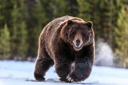

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128) #if not already at the size 128, then show it as 128

In [ ]:
#Using fastai donwload_images function

In [ ]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path("bears")

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        urls = search_images_ddg(f'{o} bear', max_images=150)
        download_images(dest, urls = urls)


In [ ]:
fns = get_image_files(path) #images were donwloaded, assuming the rest of the 18 were corrupt
fns

(#418) [Path('bears/grizzly/589a60c4-6642-4e07-9370-63837d0fa05b.jpg'),Path('bears/grizzly/13a6300c-4b44-41f3-af64-7577813f9de9.jpg'),Path('bears/grizzly/bd769492-d494-440b-8bfb-10184ed490b2.jpg'),Path('bears/grizzly/fdc58a80-5895-4319-a922-711a9e7aa43c.jpg'),Path('bears/grizzly/429853a9-70ea-400f-9c77-d9b839e14515.jpg'),Path('bears/grizzly/147f356f-1a34-4d77-ba24-31fa8a8c5278.jpg'),Path('bears/grizzly/11c908c5-1208-48ae-a6aa-f8fb68d4ef6c.jpg'),Path('bears/grizzly/0ca8626b-47d6-47ac-a4d9-059b5a289c60.jpg'),Path('bears/grizzly/b723edb2-116d-4c87-b0c4-2d1ed93c2307.jpg'),Path('bears/grizzly/158d64c2-71b0-4771-95eb-e1284bf97dc3.jpg')...]

In [ ]:
failed = verify_images(fns)
failed #The amount of images that were corrupt

(#19) [Path('bears/grizzly/429853a9-70ea-400f-9c77-d9b839e14515.jpg'),Path('bears/grizzly/0ca8626b-47d6-47ac-a4d9-059b5a289c60.jpg'),Path('bears/grizzly/5ad947be-aae6-4ac9-ac4a-462197e87856.JPG'),Path('bears/grizzly/475517b5-f450-4c03-a95a-dcdde28649dd.jpg'),Path('bears/grizzly/f809ae6b-9b3d-4fd0-99c2-542714158b34.jpg'),Path('bears/grizzly/5473d5f0-76b3-4990-8be2-7d155213efa8.jpg'),Path('bears/grizzly/d2e95718-fb90-442a-8597-555ed49f04dc.jpg'),Path('bears/grizzly/f33d7a5b-f37f-438d-b89e-7e803dc4d2f4.JPG'),Path('bears/teddy/85fca793-9e23-4ba4-82c6-99480e8e42b7.jpg'),Path('bears/teddy/43220884-957d-421e-8078-becd8fa2e32d.jpg')...]

In [ ]:
failed.map(Path.unlink); #Get rid of all the ones that were not valid

In [ ]:
??verify_images #Shows the source code

Object `verify_images #Shows the source code` not found.


In [ ]:
doc(verify_images) #Doc allows us to see how a function works

verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


### Bias

- Always be aware of the type of data that you are feeding into your model. Sometimes the search engines you are getting the data from can have biases

### Creating a DataLoader from our Dataset
- Essentially passses in your data and creates train and valid datasets

In [ ]:
doc(DataLoaders)

DataLoaders(*loaders, path: 'str | Path' = '.', device=None)
Basic wrapper around several `DataLoader`s.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


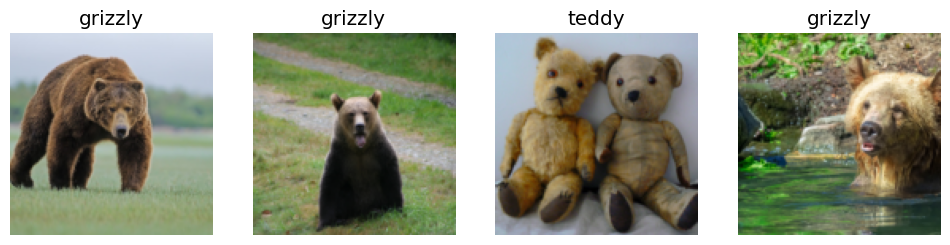

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)#Shows the validation set, where we are showing a batch of 4 items in a single row

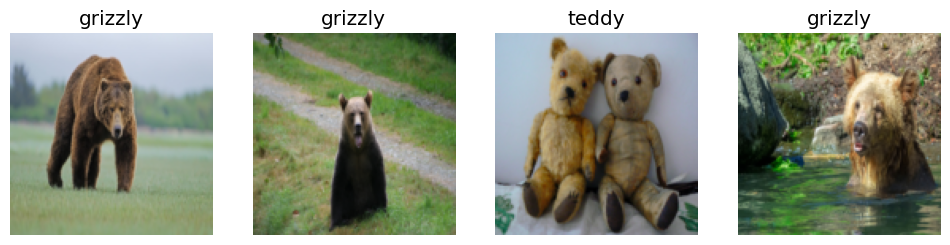

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish)) #I assume new is similar to copy() method
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1) #Doing the same as above but squishing to make sure everything fits

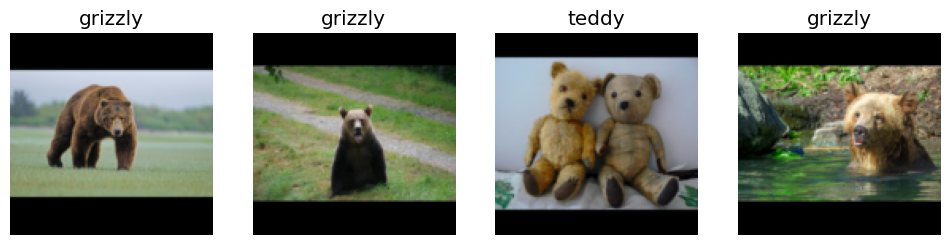

In [ ]:
#Padding the sides so that the image can fit in, not sure if its as good as the method above
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

- In reality, all the methods above wouldnt be beneficial when training a model since some are completely cropped, others have a lot of empty space, and another one is stretched and warped. The best method is to have the original image and have a bunch of cropped images of it cropped in different areas

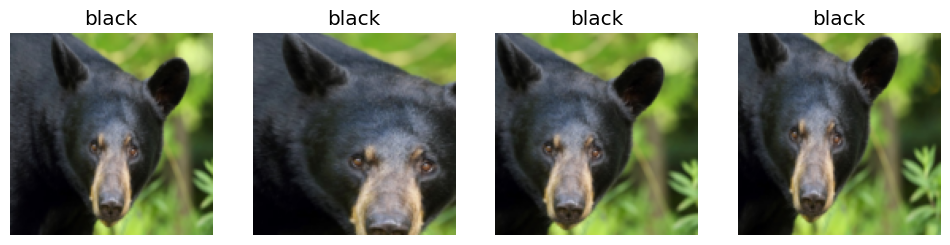

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) #One method for data augmentation
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation
- To us all of these appear the same but to a model, they appear different. A way to use less training instances to get better results.

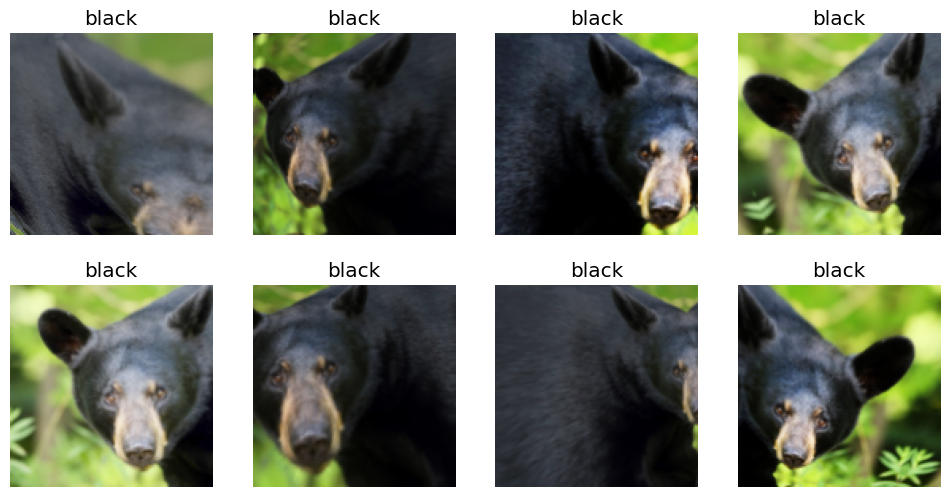

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
doc(aug_transforms)

aug_transforms(mult: 'float' = 1.0, do_flip: 'bool' = True, flip_vert: 'bool' = False, max_rotate: 'float' = 10.0, min_zoom: 'float' = 1.0, max_zoom: 'float' = 1.1, max_lighting: 'float' = 0.2, max_warp: 'float' = 0.2, p_affine: 'float' = 0.75, p_lighting: 'float' = 0.75, xtra_tfms: 'list' = None, size: 'int | tuple' = None, mode: 'str' = 'bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


### Training the Model and Using it to Clean the Data

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


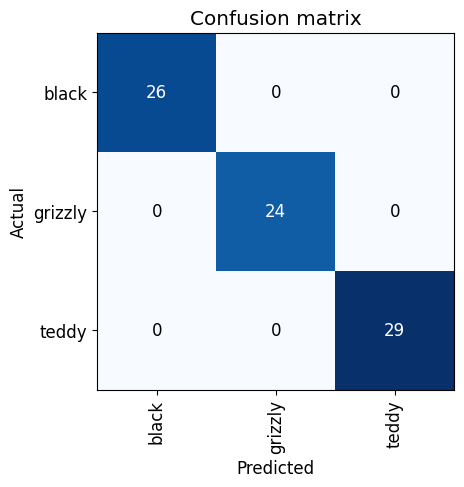

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

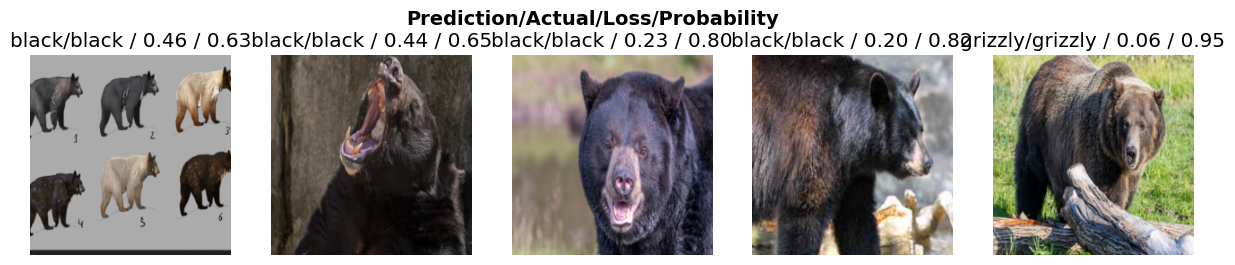

In [ ]:
interp.plot_top_losses(5, nrows=1) #Shows the images with the highest losses, can probably get rid of some if it doesnt fit the standard that we are looking for

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink() #Deletes all the ones that have a delete index


In [ ]:
for idx,cat in cleaner.change():
    dest = path/cat
    if not dest.exists(): # Check if destination exists
        shutil.move(str(cleaner.fns[idx]), dest) #Moves the ones that have a change index

Turning the Model into an Application

In [ ]:
learn.export() #Exports the model as a pkl file

In [ ]:
path = Path()
path.ls(file_exts=".pkl") #File needed for when you are deploying an app

(#1) [Path('export.pkl')]

- Inference includes the act of using a model such as the pkl one that we exported and using it for other cases in an application

In [ ]:
learn_inf = load_learner(path/'export.pkl') #Loads the model

In [ ]:
learn_inf.predict('images/grizzly.jpg') #Predicts the image that we dowloaded before

('grizzly', tensor(1), tensor([3.0033e-07, 1.0000e+00, 1.3353e-06]))

- Shows that it is almost a 100% detection rate for the grizzly bear

In [ ]:
learn_inf.dls.vocab #Shows the different categories

['black', 'grizzly', 'teddy']

Creating a Notebook App from the Model

In [ ]:
#Creating an upload section
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#Cant actually grab the uploaded image from the upload button so we are simulating it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

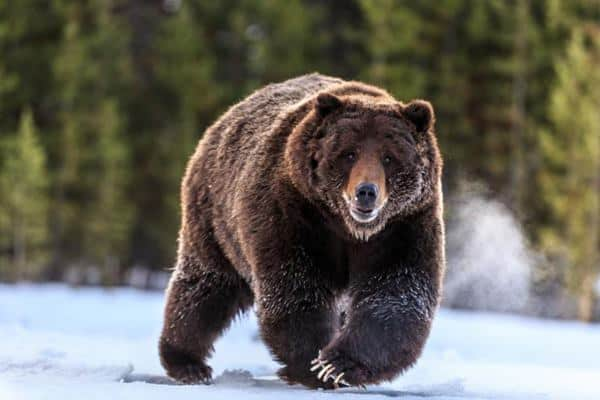

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

In [ ]:
#Displaying the image using an output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

In [ ]:
#Printing the prediction and the label
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
#Want to implement a function that when we click on the photo, it would classify the image
def on_click_classify(change): #Making everything we did above into a final function
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify) #running the classification when we click classify

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])